# Purpose
This notebook is for ad-hoc medata analysis. It is not intended to be run as part of the pipeline.

In [16]:
import pandas as pd
pd.set_option('max_colwidth', None)
df = pd.read_pickle(r"metadata_dataframes\2023-02-18-GMD-metadata.pkl")
df.head()


,identifier,recordId,title,abstract,hierarchy_level
0,f31435db833f4e689fcde021c1545975,0,"WCRP CMIP6: Met Office Hadley Centre (MOHC) UKESM1-0-LL model output for the ""piClim-HC"" experiment","The World Climate Research Program (WCRP) Coupled Model Intercomparison Project, Phase 6 (CMIP6) data from the Met Office Hadley Centre (MOHC) UKESM1-0-LL model output for the ""pre-industrial climatological SSTs and forcing, but with 2014 halocarbon concentrations (including chemistry)"" (piClim-HC) experiment. These are available at the following frequencies: AERmon, AERmonZ, Amon, CFmon, Eday, EdayZ, Emon, EmonZ, Lmon, SIday, SImon and day. The runs included the ensemble member: r2i1p1f2.\n\nCMIP6 was a global climate model intercomparison project, coordinated by PCMDI (Program For Climate Model Diagnosis and Intercomparison) on behalf of the WCRP and provided input for the Intergovernmental Panel on Climate Change (IPCC) 6th Assessment Report (AR6).\n\nThe official CMIP6 Citation, and its associated DOI, is provided as an online resource linked to this record.",dataset
1,e36e407461bd52d0a758c77a888d0ef8,1,Hydrographic data profiles collected by a conductivity-temperature-depth (CTD) sensor package during RRS Challenger cruise CH16/79,"The dataset comprises 40 hydrographic data profiles, collected by a conductivity-temperature-depth (CTD) sensor package, within the North East Atlantic Ocean area, incorporating a short section of the Ellett Line to the east of the Anton Dohrn Seamount, together with the Little Minch and North Minch sections. The data were collected during October and November 1979. A complete list of all data parameters are described by the SeaDataNet Parameter Discovery Vocabulary (PDV) keywords assigned in this metadata record. The data were collected by the Scottish Marine Biological Association.",dataset
2,47036285256244ccbf28b0a7fcdb4c1c,2,WCRP CMIP5: College of Global Change and Earth System Science (GCESS) BNU-ESM model output for the sstClim4xCO2 experiment,"WCRP CMIP5: College of Global Change and Earth System Science (GCESS) BNU-ESM model output for the SST Climatology With 4XCO2 Forcing (sstClim4xCO2) experiment. These data cover the following realms: aerosol, atmos, land and landIce; at the following frequencies: day and mon. The runs included the ensemble member: r1i1p1.\n\nThe WCRP Coupled Model Intercomparison Project, Phase 5 (CMIP5), was a global climate model intercomparison project, coordinated by PCMDI (Program For Climate Model Diagnosis and Intercomparison) on behalf of the World Climate Research Program (WCRP) and provided input for the Intergovernmental Panel on Climate Change (IPCC) 5th Assessment Report (AR5).",dataset
3,63307cdaace55cb88632a7673a52ecbf,3,Hydrographic data profiles collected by a conductivity-temperature-depth (CTD) sensor package during RRS Discovery cruise D102_1,"This dataset comprises hydrographic data profiles, collected by a conductivity-temperature-depth (CTD) sensor package, during May - June 1979. It incorporates CTD sections off the Somalian and Kenyan coasts. The data were collected by the Institute of Oceanographic Sciences Wormley Laboratory to look at the structure of the Somalian Current.",dataset
4,993fde9690764abf9b56658ce9895496,4,"WCRP CMIP6: the MIROC team MIROC-ES2L model output for the ""esm-1pct-brch-750PgC"" experiment","The World Climate Research Program (WCRP) Coupled Model Intercomparison Project, Phase 6 (CMIP6) data from the the MIROC team MIROC-ES2L model output for the ""zero emissions simulation branched from 1% run after 750 PgC cumulative emission"" (esm-1pct-brch-750PgC) experiment. These are available at the following frequencies: Amon and Lmon. The runs included the ensemble member: r1i1p1f2.\n\nCMIP6 was a global climate model intercomparison project, coordinated by PCMDI (Program For Climate Model Diagnosis and Intercomparison) on behalf of the WCRP and provided input for the Intergovernmental Panel on Climate Change (IPCC) 6th Assessmen

In [17]:
df.hierarchy_level.value_counts()

dataset                 14060
nonGeographicDataset      805
series                    698
service                    71
application                13
model                       2
Name: hierarchy_level, dtype: int64

<AxesSubplot: >

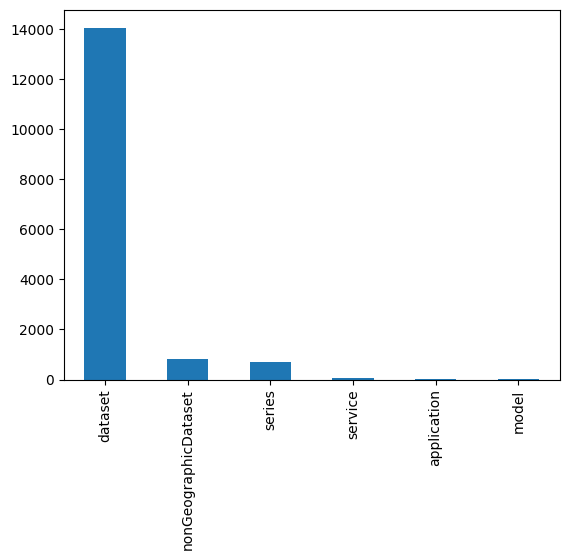

In [18]:
df.hierarchy_level.value_counts().plot(kind='bar')

In [19]:
duplicated_id_df = df[df.duplicated(subset=['identifier'], keep=False)].sort_values(by='identifier')
duplicated_id_df


,identifier,recordId,title,abstract,hierarchy_level
4718,38c5ef12dad55a5c9a8926d8acb0fffe,1418,Joint Air-Sea Interaction (JASIN) 1978 Project Data Set,"The Joint Air-Sea Interaction (JASIN) 78 Project Data Set comprises a variety of measurements including upper air and near surface meteorology, and physical oceanography. Meteorological data include air temperature, pressure, humidity and wind, while oceanographic data include temperature, salinity, currents, wave spectra and short-term wave statistics. The data were collected in the North Rockall Trough, an area of deep water (1000m - 2000m) several hundred kilometres off the west coast of Scotland. The experiment lasted for 2 months from mid-July to mid-September 1978 and comprised 2 intensive observational phases preceded by a preparatory test period. Data were collected using a variety of instrumentation, with meteorological data being provided by radiosondes, tethered balloons, and ship- and aircraft-mounted sensors. Hydrographic data were collected via shipboard deployment of conductivity-temperature-depth (CTD) sensor packages (both standard and yoyo profiles), towed thermistor chains, ship-mounted wave recorders and moored temperature and current meters. The JASIN Project was designed to study the interaction of the atmospheric and oceanic boundary layers with the large scale motions of the sea and air. The multiplicity of processes sampled necessitated a large experiment and involved more than 50 teams of investigators from nine countries. The data are held at the British Oceanographic Data Centre and many series are available via BODC's online data delivery portal.",dataset
6447,38c5ef12dad55a5c9a8926d8acb0fffe,15647,Joint Air-Sea Interaction (JASIN) 1978 Project Data Set,"The Joint Air-Sea Interaction (JASIN) 78 Project Data Set comprises a variety of measurements including upper air and near surface meteorology, and physical oceanography. Meteorological data include air temperature, pressure, humidity and wind, while oceanographic data include temperature, salinity, currents, wave spectra and short-term wave statistics. The data were collected in the North Rockall Trough, an area of deep water (1000m - 2000m) several hundred kilometres off the west coast of Scotland. The experiment lasted for 2 months from mid-July to mid-September 1978 and comprised 2 intensive observational phases preceded by a preparatory test period. Data were collected using a variety of instrumentation, with meteorological data being provided by radiosondes, tethered balloons, and ship- and aircraft-mounted sensors. Hydrographic data were collected via shipboard deployment of conductivity-temperature-depth (CTD) sensor packages (both standard and yoyo profiles), towed thermistor chains, ship-mounted wave recorders and moored temperature and current meters. The JASIN Project was designed to study the interaction of the atmospheric and oceanic boundary layers with the large scale motions of the sea and air. The multiplicity of processes sampled necessitated a large experiment and involved more than 50 teams of investigators from nine countries. The data are held at the British Oceanographic Data Centre and many series are available via BODC's online data delivery portal.",dataset
6450,6f4c780e44cd55d3bf87176d82609dc9,15650,INlet Dynamics Initiative: Algarve (INDIA) Project Data Set - Inlet dynamics data collected in the Ria Formosa National Park. January - March 1999,"The dataset comprises measurements of hydrographic, bathymetric, sedimentary and meteorological parameters. These include water currents, temperature, salinity and wave parameters; suspended and seabed sediment; coastal geomorphological characteristics; and atmospheric temperature, pressure, humidity, irradiance and wind velocities. The study area was centred on the tidal inlet within the Peninsula do Ancao, Ria Formosa National Park, Algarve, Portugal. Field measurements were collected in the offshore area, the surf zone, beach ex

In [20]:
df[df.title.isnull()]

,identifier,recordId,title,abstract,hierarchy_level
11887,None,6536,None,None,None
12896,None,7445,None,None,None


In [ ]:
# # my take on stringd distance
# import numpy as np
# from tqdm import tqdm
# from leven import levenshtein   

# df = df[df.title.notnull()]
# titles = df.title.to_numpy()
# n = len(titles)
# mat = np.empty((n, n))
# mat[:] = np.nan

# for i in tqdm(range(n)):
#     for j in range(i, n):
#         if i == j:
#             mat[i, j] = 0
#             continue
#         mat[j, i] = levenshtein(titles[i], titles[j])
# mat